In [2]:
!kaggle datasets list

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide              8KB  2023-02-01 12:22:51           8817        285  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                           23KB  2023-02-07 18:42:21           7189        170  1.0              
amaanansari09/top-100-songs                                Top 100 songs                                 6KB  2023-02-16 18:55:35           2157         72  1.0              
justin2028/unemployment-in-america-per-us-state            Unemployment in America, Per US State       826KB  2023-03-02 07:2

In [3]:
!kaggle datasets list -s flowers

ref                                     title                                  size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------  -----------------------------------  ------  -------------------  -------------  ---------  ---------------  
alxmamaev/flowers-recognition           Flowers Recognition                   225MB  2021-07-16 16:00:32          81805       1721  0.625            
l3llff/flowers                          🌸 | Flowers                           228MB  2022-04-29 20:37:05           2627         58  0.875            
imsparsh/flowers-dataset                Flowers Dataset                       205MB  2021-02-19 21:41:06           1876         28  0.9411765        
cdeotte/oxford-flowers-tfrecords        Oxford Flowers TFRecords                6GB  2020-03-12 16:20:14            163         45  0.625            
muhammedtausif/rose-flowers             Rose Flowers                          191MB  2022-04-03 17:3

In [4]:
!kaggle datasets download -d alxmamaev/flowers-recognition


  0%|          | 0.00/225M [00:00<?, ?B/s]
  0%|          | 1.00M/225M [00:00<03:33, 1.10MB/s]
  1%|          | 2.00M/225M [00:02<03:52, 1.00MB/s]
  1%|▏         | 3.00M/225M [00:03<03:59, 970kB/s] 
  2%|▏         | 4.00M/225M [00:04<03:55, 983kB/s]
  2%|▏         | 5.00M/225M [00:05<03:54, 981kB/s]
  3%|▎         | 6.00M/225M [00:06<03:54, 977kB/s]
  3%|▎         | 7.00M/225M [00:07<03:53, 977kB/s]
  4%|▎         | 8.00M/225M [00:08<03:54, 969kB/s]
  4%|▍         | 9.00M/225M [00:09<03:51, 978kB/s]
  4%|▍         | 10.0M/225M [00:10<03:50, 975kB/s]
  5%|▍         | 11.0M/225M [00:11<03:50, 973kB/s]
  5%|▌         | 12.0M/225M [00:12<03:49, 971kB/s]
  6%|▌         | 13.0M/225M [00:13<03:48, 972kB/s]
  6%|▌         | 14.0M/225M [00:15<03:46, 974kB/s]
  7%|▋         | 15.0M/225M [00:16<03:46, 972kB/s]
  7%|▋         | 16.0M/225M [00:17<03:45, 971kB/s]
  8%|▊         | 17.0M/225M [00:18<03:44, 972kB/s]
  8%|▊         | 18.0M/225M [00:19<03:42, 973kB/s]
  8%|▊         | 19.0M/225M [00:20<

In [5]:
# Unzip the dataset
!tar -xf flowers-recognition.zip

In [2]:
# Import modules
import os
from PIL import Image
import random
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision.io import read_image, ImageReadMode
import random
import numpy as np

In [3]:
# Create funtions to seet random seeds for reproducibility
def _init_seed(seed):
  os.environ['PYTHONHASHSEED'] = str(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
  np.random.seed(seed)  # Numpy module.
  random.seed(seed)  # Python random module.
  torch.backends.cudnn.benchmark = False
  torch.backends.cudnn.deterministic = True

def _init_fn(worker_id):
    np.random.seed(0 + worker_id)

Number of images of  daisy : 764
Number of images of  dandelion : 1052
Number of images of  rose : 784
Number of images of  sunflower : 733
Number of images of  tulip : 984


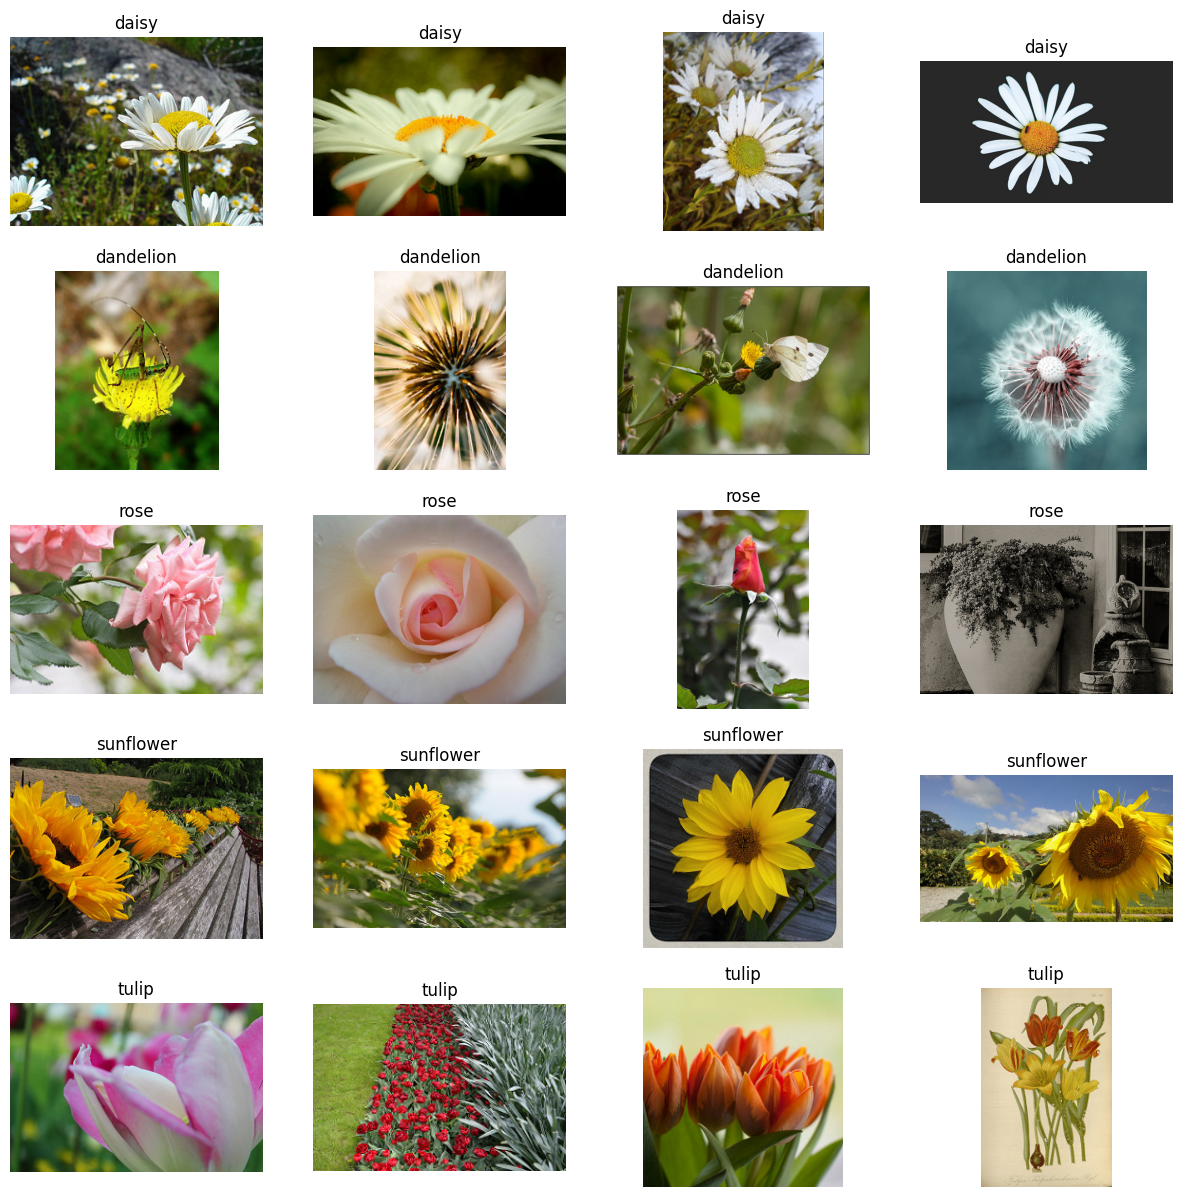

In [4]:
# Explore the data
fig = plt.figure(figsize=(15,15)) 
tot_images = 20
num_images_for_each = 4
for num_folder, folder in enumerate(os.listdir("flowers")):
    print("Number of images of ", folder,":",len(os.listdir("flowers/" + folder)))
    files = os.listdir("flowers/" + folder)
    random.shuffle(files)
    for num, fn in enumerate(files[:num_images_for_each]):
        path = os.path.join("flowers/" + folder,fn)
        img = Image.open(path)
        plt.subplot(tot_images//4,4,num_folder*4+num+1)
        plt.title(folder)
        plt.axis('off')
        plt.imshow(img)
plt.show()

In [5]:
from workers import FlowerDataset

dataset = FlowerDataset("flowers")

_init_seed(0)

image, label = dataset.__getitem__(0)

# Try to sample 1000 images and see the class distribution
labels = []
for i in range(2000):
    _, label = dataset.__getitem__(i)
    labels.append(label)

print(labels.count(0))
print(labels.count(1))
print(labels.count(2))
print(labels.count(3))
print(labels.count(4))

401
396
395
427
381


In [18]:
class SimpleNet(nn.Module):
    def __init__(self, n_classes):
        super(SimpleNet, self).__init__() 
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1, bias=False) # Important bias = False
        self.norm1 = nn.BatchNorm2d(num_features=32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False) # Important bias = False
        self.norm2 = nn.BatchNorm2d(num_features=64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1, bias=False) # Important bias = False
        self.norm3 = nn.BatchNorm2d(num_features=32)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1, bias=False) # Important bias = False
        self.norm4 = nn.BatchNorm2d(num_features=16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.final_pool = nn.AdaptiveMaxPool2d(output_size=(16,16))
        self.fc1 = nn.Linear(in_features=16**3, out_features=128, bias=False) # Important bias = False
        self.norm5 = nn.BatchNorm1d(num_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=n_classes)
        self.dropout = nn.Dropout(p=0.3)
        self.activation = nn.Tanh()

    def forward(self, imgs):
        out_first_conv = self.activation(self.pool(self.conv1(imgs)))
        out_first_conv = self.dropout(self.norm1(out_first_conv))

        out_second_conv = self.activation(self.pool(self.conv2(out_first_conv)))
        out_second_conv = self.dropout(self.norm2(out_second_conv))

        out_third_conv = self.activation(self.conv3(out_second_conv))
        out_third_conv = self.dropout(self.norm3(out_third_conv))

        out_fourth_conv = self.activation(self.pool(self.conv4(out_third_conv)))
        out_fourth_conv = self.dropout(self.final_pool(self.norm4(out_fourth_conv)))
        
        out_first_fc = self.activation(self.fc1(out_fourth_conv.view(out_fourth_conv.shape[0],-1)))
        out_first_fc = self.dropout(self.norm5(out_first_fc))
        
        out_second_fc = self.fc2(out_first_fc)
        return out_second_fc

In [19]:
# Build datasets, dataloader
import torchvision.transforms as transf

transforms_train = transf.Compose([transf.Resize((128,128)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
transforms_test_val = transf.Compose([transf.Resize((128,128)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [20]:
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
from workers import get_loaders

trainloader, valloader, testloader = get_loaders(transforms_train,transforms_test_val)

_init_seed(0)

# Use cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the model 
model = SimpleNet(n_classes=5)
model.to(device)

print("Tot model parameters:", sum([param.numel() for param in model.parameters()]))

# Hyperparameters 
learning_rate = 5e-3
epochs = 20

# Get the optimizer
optimizer = SGD(model.parameters(),lr=learning_rate)

# Get the loss function 
loss_fn = CrossEntropyLoss(reduction="mean")

# Start the training loop
for epoch in range(epochs):
  loss_training = 0
  accuracy_training = 0 
  print("Epoch:", epoch)
  for i, data in enumerate(tqdm(trainloader)):
    imgs, labels = data
    # Send data to GPU
    imgs = imgs.to(device)
    labels = labels.to(device)
    predictions = model(imgs)
    loss = loss_fn(predictions,labels.view(-1))
    
    # Calculate the training accuracy 
    accuracy_training += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()

    # Zero the gradients in the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_training += loss.item()
  
  # Test on validation images 
  loss_validation = 0
  accuracy_validation = 0
  with torch.no_grad():
    model.eval()
    for i, data in enumerate(tqdm(valloader)):
      imgs, labels = data
      # Send data to GPU
      imgs = imgs.to(device)
      labels = labels.to(device)
      # Apply transformation in validation
      imgs = transforms_test_val(imgs)
      predictions = model(imgs)
      loss = loss_fn(predictions,labels.view(-1))
      loss_validation += loss.item()
      accuracy_validation += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()
      
    # Put again model in training mode
    model.train()

  print("\nTraining loss epoch ",epoch,":",loss_training/len(trainloader))
  print("Training accuracy epoch ",epoch,":",accuracy_training/len(trainloader))
  print("Validation loss epoch ",epoch,":",loss_validation/len(valloader))
  print("Validation accuracy epoch ",epoch,":",accuracy_validation/len(valloader))

Tot model parameters: 567813
Epoch: 0


100%|██████████| 43/43 [00:05<00:00,  8.54it/s]



Training loss epoch  0 : 1.362233236853445
Training accuracy epoch  0 : 0.4280848329202068
Validation loss epoch  0 : 1.6661070387723833
Validation accuracy epoch  0 : 0.35838870461597
Epoch: 1


100%|██████████| 43/43 [00:01<00:00, 33.54it/s]



Training loss epoch  1 : 1.1953296238475104
Training accuracy epoch  1 : 0.5172879177990793
Validation loss epoch  1 : 1.467334974643796
Validation accuracy epoch  1 : 0.45805647899938184
Epoch: 2


100%|██████████| 43/43 [00:01<00:00, 32.98it/s]



Training loss epoch  2 : 1.1114483389878946
Training accuracy epoch  2 : 0.5532776350227298
Validation loss epoch  2 : 1.4592285745365674
Validation accuracy epoch  2 : 0.4406146185342656
Epoch: 3


100%|██████████| 43/43 [00:01<00:00, 35.57it/s]



Training loss epoch  3 : 1.0981329055096005
Training accuracy epoch  3 : 0.5657455012930083
Validation loss epoch  3 : 1.5667199021161988
Validation accuracy epoch  3 : 0.430647840680078
Epoch: 4


100%|██████████| 43/43 [00:01<00:00, 33.89it/s]



Training loss epoch  4 : 1.0215160858202104
Training accuracy epoch  4 : 0.6068123393622646
Validation loss epoch  4 : 1.3406850723333137
Validation accuracy epoch  4 : 0.47591362165850265
Epoch: 5


100%|██████████| 43/43 [00:01<00:00, 33.91it/s]



Training loss epoch  5 : 1.0008900386968431
Training accuracy epoch  5 : 0.6174164524728044
Validation loss epoch  5 : 1.4651925092519715
Validation accuracy epoch  5 : 0.4750830572704936
Epoch: 6


100%|██████████| 43/43 [00:01<00:00, 33.15it/s]



Training loss epoch  6 : 0.9585891719955405
Training accuracy epoch  6 : 0.6334832905190769
Validation loss epoch  6 : 1.4463816025229388
Validation accuracy epoch  6 : 0.4514119604299235
Epoch: 7


100%|██████████| 43/43 [00:01<00:00, 33.78it/s]



Training loss epoch  7 : 0.9217537655315546
Training accuracy epoch  7 : 0.6498714653262749
Validation loss epoch  7 : 1.3383203564688217
Validation accuracy epoch  7 : 0.5236710964940315
Epoch: 8


100%|██████████| 43/43 [00:01<00:00, 35.77it/s]



Training loss epoch  8 : 0.8850497207329022
Training accuracy epoch  8 : 0.6660025707017486
Validation loss epoch  8 : 1.4170528449291406
Validation accuracy epoch  8 : 0.5137043193329213
Epoch: 9


100%|██████████| 43/43 [00:01<00:00, 34.24it/s]



Training loss epoch  9 : 0.8892356197907563
Training accuracy epoch  9 : 0.6649742930897711
Validation loss epoch  9 : 1.5240841805934906
Validation accuracy epoch  9 : 0.4605481735495634
Epoch: 10


100%|██████████| 43/43 [00:01<00:00, 34.10it/s]



Training loss epoch  10 : 0.8594231032467133
Training accuracy epoch  10 : 0.676349614457177
Validation loss epoch  10 : 1.3697174000878667
Validation accuracy epoch  10 : 0.5112126261688942
Epoch: 11


100%|██████████| 43/43 [00:01<00:00, 35.22it/s]



Training loss epoch  11 : 0.8285541228356276
Training accuracy epoch  11 : 0.6882390746114186
Validation loss epoch  11 : 1.3934839182468348
Validation accuracy epoch  11 : 0.5186877084332843
Epoch: 12


100%|██████████| 43/43 [00:01<00:00, 33.81it/s]



Training loss epoch  12 : 0.8257725990370184
Training accuracy epoch  12 : 0.6800771208532672
Validation loss epoch  12 : 1.3877101325711538
Validation accuracy epoch  12 : 0.5340531565422235
Epoch: 13


100%|██████████| 43/43 [00:01<00:00, 32.98it/s]



Training loss epoch  13 : 0.7514060405118913
Training accuracy epoch  13 : 0.7179948586424703
Validation loss epoch  13 : 1.6466272591158402
Validation accuracy epoch  13 : 0.4875415286352468
Epoch: 14


100%|██████████| 43/43 [00:01<00:00, 33.83it/s]



Training loss epoch  14 : 0.7758412977876884
Training accuracy epoch  14 : 0.7081619537887965
Validation loss epoch  14 : 1.4178746827813082
Validation accuracy epoch  14 : 0.5423588045807772
Epoch: 15


100%|██████████| 43/43 [00:01<00:00, 33.31it/s]



Training loss epoch  15 : 0.7307582642586188
Training accuracy epoch  15 : 0.731748071994757
Validation loss epoch  15 : 1.3598763395187468
Validation accuracy epoch  15 : 0.5174418604651163
Epoch: 16


100%|██████████| 43/43 [00:01<00:00, 32.09it/s]



Training loss epoch  16 : 0.7127305405037262
Training accuracy epoch  16 : 0.7393316195985652
Validation loss epoch  16 : 1.6361960333793661
Validation accuracy epoch  16 : 0.49210963484852815
Epoch: 17


100%|██████████| 43/43 [00:01<00:00, 35.60it/s]



Training loss epoch  17 : 0.6972083876479255
Training accuracy epoch  17 : 0.7386889460767143
Validation loss epoch  17 : 1.4107846153336903
Validation accuracy epoch  17 : 0.5490033238433129
Epoch: 18


100%|██████████| 43/43 [00:01<00:00, 35.36it/s]



Training loss epoch  18 : 0.6985386290556361
Training accuracy epoch  18 : 0.7413239074550129
Validation loss epoch  18 : 1.4454772562481637
Validation accuracy epoch  18 : 0.527823920859847
Epoch: 19


100%|██████████| 43/43 [00:01<00:00, 33.67it/s]


Training loss epoch  19 : 0.6392737074843715
Training accuracy epoch  19 : 0.7703727506733186
Validation loss epoch  19 : 1.2462624027285465
Validation accuracy epoch  19 : 0.5797342200611912


In [13]:
# Save the weights of the network
torch.save(model.state_dict(), "weights/weight_1.pth")

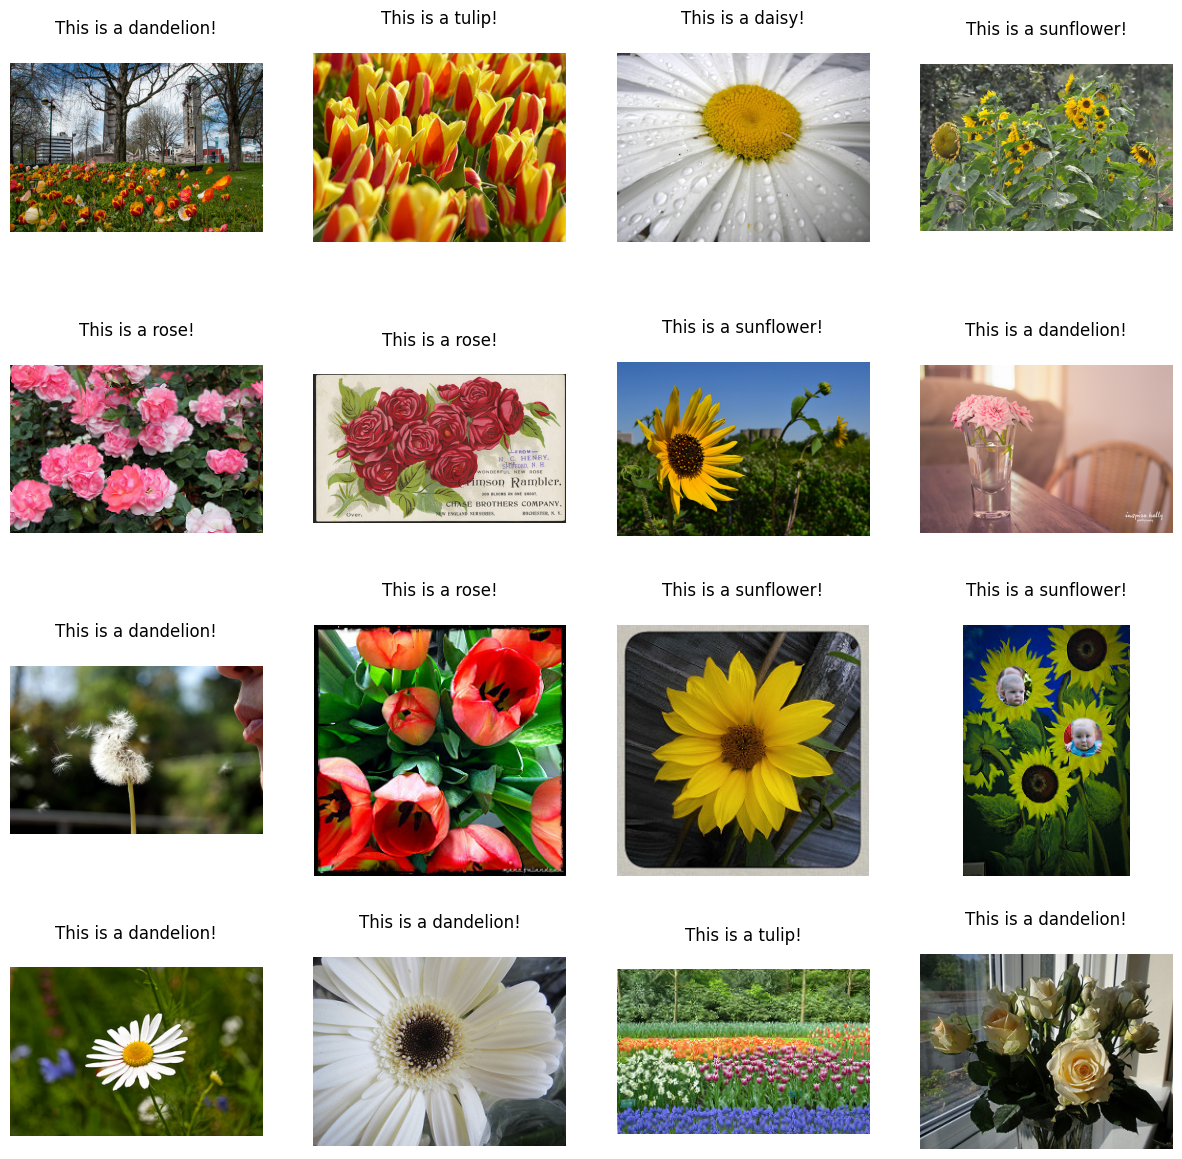

In [21]:
# Explore the data 
fig = plt.figure(figsize=(15,15))
num_images = 16
transforms_test = transf.Compose([
                            transf.Resize((128,128)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])
model.eval()
with torch.no_grad():
  _init_seed(0)
  for i in range(num_images):
    random_img = random.randint(0,len(testloader)-1)
    image, label = testloader[random_img]
    # Apply transformation innum_images testing
    out = model(transforms_test(image).unsqueeze(0).to(device))
    prediction = out.argmax(1)
    plt.subplot(num_images//4,4,i+1)
    plt.axis('off')
    plt.imshow(image.moveaxis(0,-1))
    if(prediction.item()==0):
      plt.title("This is a daisy!\n")
    elif (prediction.item()==1):
      plt.title("This is a dandelion!\n")
    elif (prediction.item()==2):
      plt.title("This is a rose!\n")
    elif (prediction.item()==3):
      plt.title("This is a sunflower!\n")
    elif(prediction.item()==4):
      plt.title("This is a tulip!\n")

plt.show()

In [27]:
# Build datasets, dataloader
import torchvision.transforms as transf

transforms_train = transf.Compose([
                            transf.Resize((256,256)),
                            transf.CenterCrop((224,224)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
transforms_test_val = transf.Compose([
                            transf.Resize((256,256)),
                            transf.CenterCrop((224,224)),  
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [28]:
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
from workers import get_loaders
from torchvision.models import resnet18, ResNet18_Weights

trainloader, valloader, testset = get_loaders(transforms_train,transforms_test_val)

_init_seed(0)

# Use cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the model 
model = resnet18(weights = ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(in_features=512, out_features=5)
model.to(device)

for name, param in model.named_parameters():
  if "fc" not in name:
    param.requires_grad = False

print("Tot model parameters:", sum([param.numel() for param in model.parameters()]))
print("Trainable parameters:", sum([param.numel() for param in model.parameters() if param.requires_grad]))

# Hyperparameters 
learning_rate = 5e-3
epochs = 20

# Get the optimizer
optimizer = SGD(model.parameters(),lr=learning_rate)

# Get the loss function 
loss_fn = CrossEntropyLoss(reduction="mean")

# Start the training loop
for epoch in range(epochs):
  loss_training = 0
  accuracy_training = 0 
  print("Epoch:", epoch)
  for i, data in enumerate(tqdm(trainloader)):
    imgs, labels = data
    # Send data to GPU
    imgs = imgs.to(device)
    labels = labels.to(device)
    predictions = model(imgs)
    loss = loss_fn(predictions,labels.view(-1))
    
    # Calculate the training accuracy 
    accuracy_training += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()

    # Zero the gradients in the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_training += loss.item()
  
  # Test on validation images 
  loss_validation = 0
  accuracy_validation = 0
  with torch.no_grad():
    model.eval()
    for i, data in enumerate(tqdm(valloader)):
      imgs, labels = data
      # Send data to GPU
      imgs = imgs.to(device)
      labels = labels.to(device)
      predictions = model(imgs)
      loss = loss_fn(predictions,labels.view(-1))
      loss_validation += loss.item()
      accuracy_validation += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()
      
    # Put again model in training mode
    model.train()

  print("\nTraining loss epoch ",epoch,":",loss_training/len(trainloader))
  print("Training accuracy epoch ",epoch,":",accuracy_training/len(trainloader))
  print("Validation loss epoch ",epoch,":",loss_validation/len(valloader))
  print("Validation accuracy epoch ",epoch,":",accuracy_validation/len(valloader))

Tot model parameters: 11179077
Trainable parameters: 2565
Epoch: 0


100%|██████████| 43/43 [00:01<00:00, 23.61it/s]



Training loss epoch  0 : 0.8597684532097495
Training accuracy epoch  0 : 0.6781491002877145
Validation loss epoch  0 : 0.4834667419971422
Validation accuracy epoch  0 : 0.8226744186046512
Epoch: 1


100%|██████████| 43/43 [00:01<00:00, 23.11it/s]



Training loss epoch  1 : 0.5762010985520934
Training accuracy epoch  1 : 0.7951156812645782
Validation loss epoch  1 : 0.470491289659295
Validation accuracy epoch  1 : 0.8372093023255814
Epoch: 2


100%|██████████| 43/43 [00:02<00:00, 21.01it/s]



Training loss epoch  2 : 0.5573641799562694
Training accuracy epoch  2 : 0.800771208226221
Validation loss epoch  2 : 0.3944335829379947
Validation accuracy epoch  2 : 0.8633720930232558
Epoch: 3


100%|██████████| 43/43 [00:02<00:00, 20.78it/s]



Training loss epoch  3 : 0.4983357060509123
Training accuracy epoch  3 : 0.8226221079691517
Validation loss epoch  3 : 0.38872705945788427
Validation accuracy epoch  3 : 0.8604651162790697
Epoch: 4


100%|██████████| 43/43 [00:01<00:00, 21.60it/s]



Training loss epoch  4 : 0.4615639520660617
Training accuracy epoch  4 : 0.832069408771005
Validation loss epoch  4 : 0.3663557624920856
Validation accuracy epoch  4 : 0.877906976744186
Epoch: 5


100%|██████████| 43/43 [00:01<00:00, 22.90it/s]



Training loss epoch  5 : 0.46136421514890497
Training accuracy epoch  5 : 0.8354755784061697
Validation loss epoch  5 : 0.3619552764521782
Validation accuracy epoch  5 : 0.8691860465116279
Epoch: 6


100%|██████████| 43/43 [00:01<00:00, 23.39it/s]



Training loss epoch  6 : 0.45177662841362787
Training accuracy epoch  6 : 0.8391388175113649
Validation loss epoch  6 : 0.35854027480926626
Validation accuracy epoch  6 : 0.872093023255814
Epoch: 7


100%|██████████| 43/43 [00:01<00:00, 23.63it/s]



Training loss epoch  7 : 0.4057906365649329
Training accuracy epoch  7 : 0.8518637532133676
Validation loss epoch  7 : 0.3731727190748897
Validation accuracy epoch  7 : 0.8604651162790697
Epoch: 8


100%|██████████| 43/43 [00:01<00:00, 22.21it/s]



Training loss epoch  8 : 0.41948657471370576
Training accuracy epoch  8 : 0.8396529562982005
Validation loss epoch  8 : 0.36523483009185903
Validation accuracy epoch  8 : 0.8575581395348837
Epoch: 9


100%|██████████| 43/43 [00:01<00:00, 21.63it/s]



Training loss epoch  9 : 0.4345423195673905
Training accuracy epoch  9 : 0.839910025768231
Validation loss epoch  9 : 0.3558485664773819
Validation accuracy epoch  9 : 0.8837209302325582
Epoch: 10


100%|██████████| 43/43 [00:01<00:00, 22.44it/s]



Training loss epoch  10 : 0.4112766996351643
Training accuracy epoch  10 : 0.8595115681846834
Validation loss epoch  10 : 0.3452313575287198
Validation accuracy epoch  10 : 0.8895348837209303
Epoch: 11


100%|██████████| 43/43 [00:01<00:00, 22.98it/s]



Training loss epoch  11 : 0.4128270759474687
Training accuracy epoch  11 : 0.8474935732954265
Validation loss epoch  11 : 0.36789003538704196
Validation accuracy epoch  11 : 0.8866279069767442
Epoch: 12


100%|██████████| 43/43 [00:01<00:00, 22.47it/s]



Training loss epoch  12 : 0.3584452909070299
Training accuracy epoch  12 : 0.879305912627046
Validation loss epoch  12 : 0.34046748785172093
Validation accuracy epoch  12 : 0.8866279069767442
Epoch: 13


100%|██████████| 43/43 [00:01<00:00, 22.10it/s]



Training loss epoch  13 : 0.38658105832187023
Training accuracy epoch  13 : 0.8638817481026245
Validation loss epoch  13 : 0.3415358034070841
Validation accuracy epoch  13 : 0.8808139534883721
Epoch: 14


100%|██████████| 43/43 [00:01<00:00, 22.70it/s]



Training loss epoch  14 : 0.4086410582932263
Training accuracy epoch  14 : 0.8519922879483829
Validation loss epoch  14 : 0.3464191376209952
Validation accuracy epoch  14 : 0.877906976744186
Epoch: 15


100%|██████████| 43/43 [00:01<00:00, 22.79it/s]



Training loss epoch  15 : 0.4078189328667207
Training accuracy epoch  15 : 0.8539203085139355
Validation loss epoch  15 : 0.3429526117045519
Validation accuracy epoch  15 : 0.8808139534883721
Epoch: 16


100%|██████████| 43/43 [00:01<00:00, 23.11it/s]



Training loss epoch  16 : 0.39030433511768486
Training accuracy epoch  16 : 0.8664524421900281
Validation loss epoch  16 : 0.3582376220241882
Validation accuracy epoch  16 : 0.872093023255814
Epoch: 17


100%|██████████| 43/43 [00:01<00:00, 23.32it/s]



Training loss epoch  17 : 0.382603882934065
Training accuracy epoch  17 : 0.8605398457583547
Validation loss epoch  17 : 0.3546401254702793
Validation accuracy epoch  17 : 0.877906976744186
Epoch: 18


100%|██████████| 43/43 [00:01<00:00, 22.82it/s]



Training loss epoch  18 : 0.3854313929012203
Training accuracy epoch  18 : 0.8640745501285347
Validation loss epoch  18 : 0.3565194442608329
Validation accuracy epoch  18 : 0.877906976744186
Epoch: 19


100%|██████████| 43/43 [00:01<00:00, 23.94it/s]


Training loss epoch  19 : 0.40115513901554223
Training accuracy epoch  19 : 0.8555269923185628
Validation loss epoch  19 : 0.36132959371735884
Validation accuracy epoch  19 : 0.877906976744186


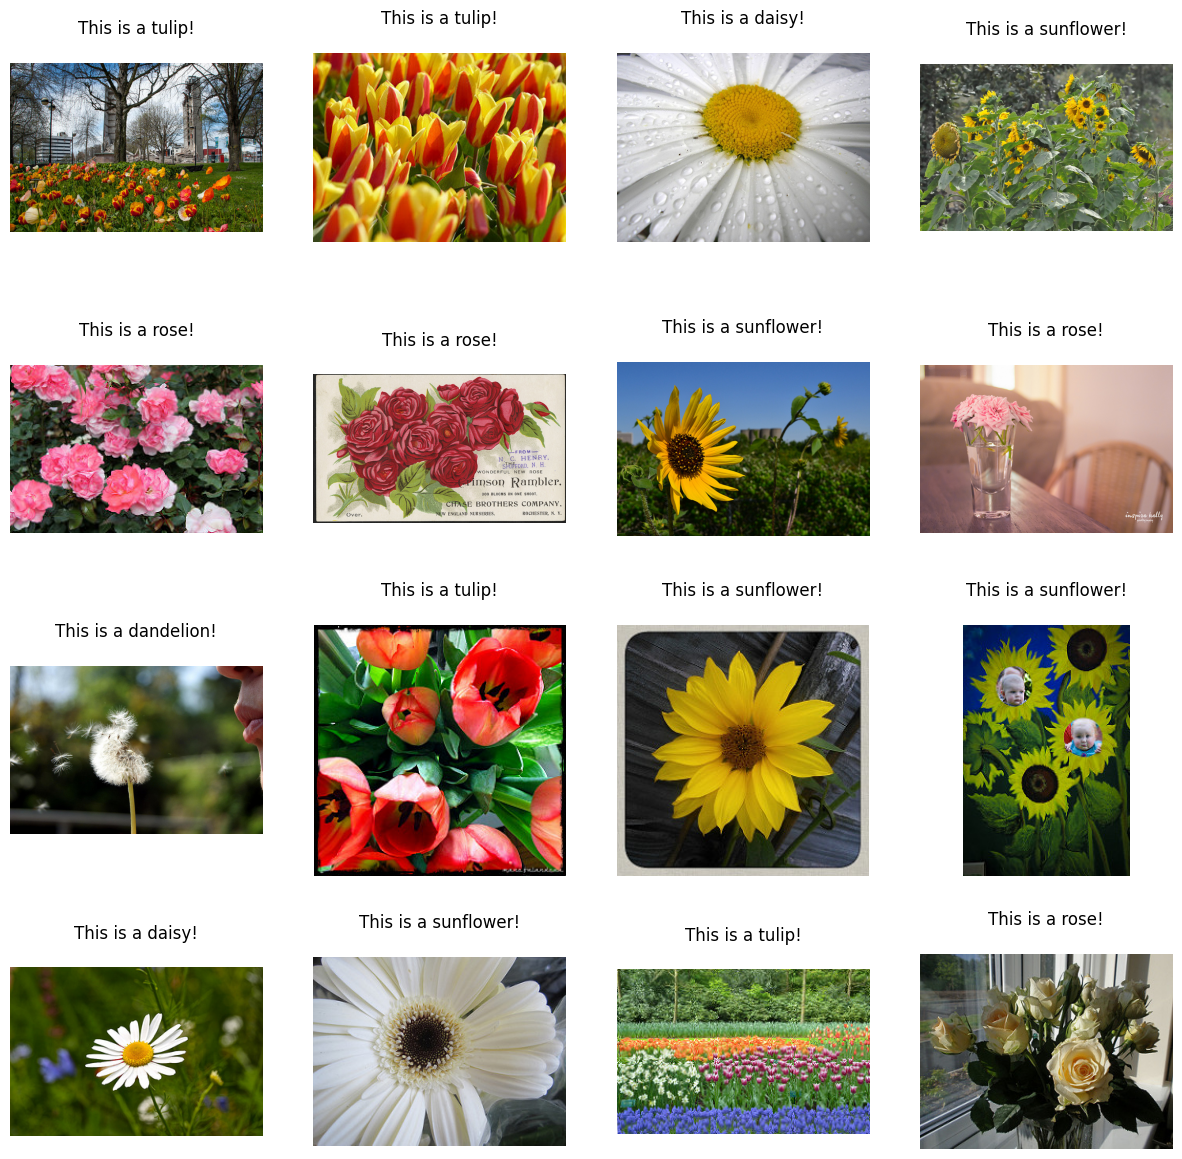

In [30]:
# Explore the data 
fig = plt.figure(figsize=(15,15))
num_images = 16
transforms_test = transf.Compose([
                            transf.Resize((256,256)), 
                            transf.CenterCrop((224,224)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])
model.eval()
with torch.no_grad():
  _init_seed(0)
  for i in range(num_images):
    random_img = random.randint(0,len(testset)-1)
    image, label = testset[random_img]
    # Apply transformation innum_images testing
    out = model(transforms_test(image).unsqueeze(0).to(device))
    prediction = out.argmax(1)
    plt.subplot(num_images//4,4,i+1)
    plt.axis('off')
    plt.imshow(image.moveaxis(0,-1))
    if(prediction.item()==0):
      plt.title("This is a daisy!\n")
    elif (prediction.item()==1):
      plt.title("This is a dandelion!\n")
    elif (prediction.item()==2):
      plt.title("This is a rose!\n")
    elif (prediction.item()==3):
      plt.title("This is a sunflower!\n")
    elif(prediction.item()==4):
      plt.title("This is a tulip!\n")

plt.show()

In [31]:
# Save the weights of the network
torch.save(model.state_dict(), "weights/weights_2.pth")

In [56]:
class SimpleNet(nn.Module):
    def __init__(self, n_classes, init_weights=True):
        super(SimpleNet, self).__init__() 
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1) # Important bias = False
        self.norm1 = nn.LayerNorm(normalized_shape=(16,64,64), elementwise_affine=False)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1) # Important bias = False
        self.norm2 = nn.LayerNorm(normalized_shape=(32,32,32), elementwise_affine=False)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1) # Important bias = False
        self.norm3 = nn.LayerNorm(normalized_shape=(32,32,32), elementwise_affine=False)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1) # Important bias = False
        self.norm4 = nn.LayerNorm(normalized_shape=(16,16,16), elementwise_affine=False)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.final_pool = nn.AdaptiveMaxPool2d(output_size=(16,16))
        self.fc1 = nn.Linear(in_features=16**2*16, out_features=128) # Important bias = False
        self.norm5 = nn.LayerNorm(normalized_shape=128, elementwise_affine=False)
        self.fc2 = nn.Linear(in_features=128, out_features=n_classes)
        self.dropout = nn.Dropout(p=0.5)
        self.activation = nn.Tanh()
        
        if init_weights:
            for m in self.modules():
                if isinstance(m, nn.Conv2d):
                    nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="tanh")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, nn.Linear):
                    nn.init.normal_(m.weight, 0, 0.01)
                    nn.init.constant_(m.bias, 0)

    def forward(self, imgs):
        out_first_conv = self.activation(self.pool(self.conv1(imgs)))
        out_first_conv = self.dropout(self.norm1(out_first_conv))

        out_second_conv = self.activation(self.pool(self.conv2(out_first_conv)))
        out_second_conv = self.dropout(self.norm2(out_second_conv))

        out_third_conv = self.activation(self.conv3(out_second_conv))
        out_third_conv = self.dropout(self.norm3(out_third_conv))

        out_fourth_conv = self.activation(self.pool(self.conv4(out_third_conv)))
        out_fourth_conv = self.dropout(self.norm4(out_fourth_conv))
        
        out_first_fc = self.activation(self.fc1(out_fourth_conv.view(out_fourth_conv.shape[0],-1)))
        out_first_fc = self.dropout(self.norm5(out_first_fc))
        
        out_second_fc = self.fc2(out_first_fc)
        return out_second_fc

In [57]:
# Build datasets, dataloader
import torchvision.transforms as transf

transforms_train = transf.Compose([
                            transf.Resize((128,128)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                            transf.RandomHorizontalFlip(0.5),
                            transf.RandomApply([transf.RandomRotation((0,360))],p=0.5),
                            transf.RandomVerticalFlip(0.5),
                            transf.RandomApply([transf.RandomResizedCrop((128,128), scale=(0.7,1.0))], p=0.5)
                            ])
transforms_test_val = transf.Compose([
                            transf.Resize((128,128)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])

In [58]:
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
from workers import get_loaders

trainloader, valloader, testset = get_loaders(transforms_train,transforms_test_val)

_init_seed(0)

# Use cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the model 
model = SimpleNet(n_classes=5)
model.to(device)

print("Tot model parameters:", sum([param.numel() for param in model.parameters()]))

# Hyperparameters 
learning_rate = 5e-3
epochs = 150

# Get the optimizer
optimizer = SGD(model.parameters(),lr=learning_rate, weight_decay=1e-4)

# Get the loss function 
loss_fn = CrossEntropyLoss(reduction="mean")

# Start the training loop
for epoch in range(epochs):
  loss_training = 0
  accuracy_training = 0 
  print("Epoch:", epoch)
  for i, data in enumerate(tqdm(trainloader)):
    imgs, labels = data
    # Send data to GPU
    imgs = imgs.to(device)
    labels = labels.to(device)
    predictions = model(imgs)
    loss = loss_fn(predictions,labels.view(-1))
    
    # Calculate the training accuracy 
    accuracy_training += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()

    # Zero the gradients in the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_training += loss.item()
  
  # Test on validation images 
  loss_validation = 0
  accuracy_validation = 0
  with torch.no_grad():
    model.eval()
    for i, data in enumerate(tqdm(valloader)):
      imgs, labels = data
      # Send data to GPU
      imgs = imgs.to(device)
      labels = labels.to(device)
      # Apply transformation in validation
      imgs = transforms_test_val(imgs)
      predictions = model(imgs)
      loss = loss_fn(predictions,labels.view(-1))
      loss_validation += loss.item()
      accuracy_validation += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()
      
    # Put again model in training mode
    model.train()

  print("\nTraining loss epoch ",epoch,":",loss_training/len(trainloader))
  print("Training accuracy epoch ",epoch,":",accuracy_training/len(trainloader))
  print("Validation loss epoch ",epoch,":",loss_validation/len(valloader))
  print("Validation accuracy epoch ",epoch,":",accuracy_validation/len(valloader))

Tot model parameters: 544021
Epoch: 0


100%|██████████| 43/43 [00:01<00:00, 35.98it/s]



Training loss epoch  0 : 1.4941964468183737
Training accuracy epoch  0 : 0.32371465298694324
Validation loss epoch  0 : 1.5449414381454156
Validation accuracy epoch  0 : 0.3114617941684501
Epoch: 1


100%|██████████| 43/43 [00:01<00:00, 35.68it/s]



Training loss epoch  1 : 1.3166549472392064
Training accuracy epoch  1 : 0.4182519280282268
Validation loss epoch  1 : 1.3152631548948066
Validation accuracy epoch  1 : 0.4144518278365911
Epoch: 2


100%|██████████| 43/43 [00:01<00:00, 36.13it/s]



Training loss epoch  2 : 1.2853060841253914
Training accuracy epoch  2 : 0.4335475578559395
Validation loss epoch  2 : 1.3234272405158642
Validation accuracy epoch  2 : 0.39825581395348836
Epoch: 3


100%|██████████| 43/43 [00:01<00:00, 34.99it/s]



Training loss epoch  3 : 1.2527098401346672
Training accuracy epoch  3 : 0.47242930592791893
Validation loss epoch  3 : 1.3243780468785487
Validation accuracy epoch  3 : 0.41362126275550487
Epoch: 4


100%|██████████| 43/43 [00:01<00:00, 35.65it/s]



Training loss epoch  4 : 1.2457320923057498
Training accuracy epoch  4 : 0.4533419023749148
Validation loss epoch  4 : 1.297943235136742
Validation accuracy epoch  4 : 0.43770764179007954
Epoch: 5


100%|██████████| 43/43 [00:01<00:00, 35.36it/s]



Training loss epoch  5 : 1.25199750425883
Training accuracy epoch  5 : 0.4705655527298738
Validation loss epoch  5 : 1.3347231953643088
Validation accuracy epoch  5 : 0.42815614647643513
Epoch: 6


100%|██████████| 43/43 [00:01<00:00, 34.93it/s]



Training loss epoch  6 : 1.1885977382831525
Training accuracy epoch  6 : 0.4933804627555808
Validation loss epoch  6 : 1.3345901376979297
Validation accuracy epoch  6 : 0.3841362127731013
Epoch: 7


100%|██████████| 43/43 [00:01<00:00, 35.48it/s]



Training loss epoch  7 : 1.1692130616207663
Training accuracy epoch  7 : 0.4857326478225713
Validation loss epoch  7 : 1.3208467246488083
Validation accuracy epoch  7 : 0.4289867115575214
Epoch: 8


100%|██████████| 43/43 [00:01<00:00, 35.71it/s]



Training loss epoch  8 : 1.155867420768983
Training accuracy epoch  8 : 0.4901028277788187
Validation loss epoch  8 : 1.288574024688366
Validation accuracy epoch  8 : 0.45847176119338634
Epoch: 9


100%|██████████| 43/43 [00:01<00:00, 36.23it/s]



Training loss epoch  9 : 1.196757583661067
Training accuracy epoch  9 : 0.4766066838199498
Validation loss epoch  9 : 1.3326200163641642
Validation accuracy epoch  9 : 0.43147840610770294
Epoch: 10


100%|██████████| 43/43 [00:01<00:00, 36.20it/s]



Training loss epoch  10 : 1.159010638308096
Training accuracy epoch  10 : 0.503920308498613
Validation loss epoch  10 : 1.3851537780706273
Validation accuracy epoch  10 : 0.37956810690635856
Epoch: 11


100%|██████████| 43/43 [00:01<00:00, 36.69it/s]



Training loss epoch  11 : 1.154516206455721
Training accuracy epoch  11 : 0.506940874043651
Validation loss epoch  11 : 1.331966072320938
Validation accuracy epoch  11 : 0.4493355487668237
Epoch: 12


100%|██████████| 43/43 [00:01<00:00, 36.56it/s]



Training loss epoch  12 : 1.1648789549241643
Training accuracy epoch  12 : 0.48746786632390743
Validation loss epoch  12 : 1.3191286256146986
Validation accuracy epoch  12 : 0.46470099826191746
Epoch: 13


100%|██████████| 43/43 [00:01<00:00, 33.54it/s]



Training loss epoch  13 : 1.1299866644766152
Training accuracy epoch  13 : 0.5153598972335266
Validation loss epoch  13 : 1.5302390165107196
Validation accuracy epoch  13 : 0.40739202672658964
Epoch: 14


100%|██████████| 43/43 [00:01<00:00, 36.20it/s]



Training loss epoch  14 : 1.158334986716126
Training accuracy epoch  14 : 0.5019922879330603
Validation loss epoch  14 : 1.3621742420418317
Validation accuracy epoch  14 : 0.39742524956547937
Epoch: 15


100%|██████████| 43/43 [00:01<00:00, 35.89it/s]



Training loss epoch  15 : 1.1211916632701315
Training accuracy epoch  15 : 0.5279562982005142
Validation loss epoch  15 : 1.3528942299443623
Validation accuracy epoch  15 : 0.45224252551100974
Epoch: 16


100%|██████████| 43/43 [00:01<00:00, 34.85it/s]



Training loss epoch  16 : 1.1328001147217492
Training accuracy epoch  16 : 0.5150385604726012
Validation loss epoch  16 : 1.4025268076464188
Validation accuracy epoch  16 : 0.4090531565422236
Epoch: 17


100%|██████████| 43/43 [00:01<00:00, 36.53it/s]



Training loss epoch  17 : 1.1229005776211658
Training accuracy epoch  17 : 0.5136246786938842
Validation loss epoch  17 : 1.3763205339742262
Validation accuracy epoch  17 : 0.4119601332864096
Epoch: 18


100%|██████████| 43/43 [00:01<00:00, 36.32it/s]



Training loss epoch  18 : 1.129700015243957
Training accuracy epoch  18 : 0.5164524421747055
Validation loss epoch  18 : 1.4146261381548504
Validation accuracy epoch  18 : 0.39327242554620256
Epoch: 19


100%|██████████| 43/43 [00:01<00:00, 36.78it/s]



Training loss epoch  19 : 1.0931752019185947
Training accuracy epoch  19 : 0.5286632390898727
Validation loss epoch  19 : 1.5304524860409803
Validation accuracy epoch  19 : 0.42109634709912674
Epoch: 20


100%|██████████| 43/43 [00:01<00:00, 36.94it/s]



Training loss epoch  20 : 1.1042291183398132
Training accuracy epoch  20 : 0.5286632390898727
Validation loss epoch  20 : 1.4101846786432488
Validation accuracy epoch  20 : 0.435215947239898
Epoch: 21


100%|██████████| 43/43 [00:01<00:00, 35.45it/s]



Training loss epoch  21 : 1.083547497623071
Training accuracy epoch  21 : 0.5352827764109045
Validation loss epoch  21 : 1.3695618427077005
Validation accuracy epoch  21 : 0.4410299007282701
Epoch: 22


100%|██████████| 43/43 [00:01<00:00, 35.25it/s]



Training loss epoch  22 : 1.101006502357424
Training accuracy epoch  22 : 0.5354113110693071
Validation loss epoch  22 : 1.3711125628892766
Validation accuracy epoch  22 : 0.41985049913095873
Epoch: 23


100%|██████████| 43/43 [00:01<00:00, 35.60it/s]



Training loss epoch  23 : 1.1058158647738263
Training accuracy epoch  23 : 0.5379820051567107
Validation loss epoch  23 : 1.3911458018214204
Validation accuracy epoch  23 : 0.4206810635189677
Epoch: 24


100%|██████████| 43/43 [00:01<00:00, 36.44it/s]



Training loss epoch  24 : 1.0833248440128365
Training accuracy epoch  24 : 0.5428020565705924
Validation loss epoch  24 : 1.3615260505399038
Validation accuracy epoch  24 : 0.43812292398408403
Epoch: 25


100%|██████████| 43/43 [00:01<00:00, 34.21it/s]



Training loss epoch  25 : 1.0584318801032853
Training accuracy epoch  25 : 0.5453727506579961
Validation loss epoch  25 : 1.3394916404125303
Validation accuracy epoch  25 : 0.43189368830170743
Epoch: 26


100%|██████████| 43/43 [00:01<00:00, 36.29it/s]



Training loss epoch  26 : 1.0589823639331564
Training accuracy epoch  26 : 0.551349614457177
Validation loss epoch  26 : 1.5314351853936217
Validation accuracy epoch  26 : 0.41985049913095873
Epoch: 27


100%|██████████| 43/43 [00:01<00:00, 36.16it/s]



Training loss epoch  27 : 1.0596950654811907
Training accuracy epoch  27 : 0.5571336761538351
Validation loss epoch  27 : 1.471744225815285
Validation accuracy epoch  27 : 0.4169435223867727
Epoch: 28


100%|██████████| 43/43 [00:01<00:00, 35.83it/s]



Training loss epoch  28 : 1.0731159541324968
Training accuracy epoch  28 : 0.5444087403752197
Validation loss epoch  28 : 1.4791917946449546
Validation accuracy epoch  28 : 0.4551495022551958
Epoch: 29


100%|██████████| 43/43 [00:01<00:00, 35.39it/s]



Training loss epoch  29 : 1.0399747909954091
Training accuracy epoch  29 : 0.5597043702412388
Validation loss epoch  29 : 1.3866949951232865
Validation accuracy epoch  29 : 0.4622093023255814
Epoch: 30


100%|██████████| 43/43 [00:01<00:00, 36.38it/s]



Training loss epoch  30 : 1.0440086405963702
Training accuracy epoch  30 : 0.5693444730690022
Validation loss epoch  30 : 1.478049408557803
Validation accuracy epoch  30 : 0.4572259139182956
Epoch: 31


100%|██████████| 43/43 [00:01<00:00, 35.04it/s]



Training loss epoch  31 : 1.0289511725804492
Training accuracy epoch  31 : 0.5696015424241138
Validation loss epoch  31 : 1.544301840455033
Validation accuracy epoch  31 : 0.42815614647643513
Epoch: 32


100%|██████████| 43/43 [00:01<00:00, 35.71it/s]



Training loss epoch  32 : 1.079196816315075
Training accuracy epoch  32 : 0.5497429306525498
Validation loss epoch  32 : 1.483374454947405
Validation accuracy epoch  32 : 0.45764119680537735
Epoch: 33


100%|██████████| 43/43 [00:01<00:00, 34.93it/s]



Training loss epoch  33 : 1.0195339784064452
Training accuracy epoch  33 : 0.5677377892643749
Validation loss epoch  33 : 1.6197050539560096
Validation accuracy epoch  33 : 0.42815614647643513
Epoch: 34


100%|██████████| 43/43 [00:01<00:00, 35.74it/s]



Training loss epoch  34 : 1.059377097072209
Training accuracy epoch  34 : 0.570694087403599
Validation loss epoch  34 : 1.3424030764158381
Validation accuracy epoch  34 : 0.4539036546335664
Epoch: 35


100%|██████████| 43/43 [00:01<00:00, 35.92it/s]



Training loss epoch  35 : 0.9997204355991285
Training accuracy epoch  35 : 0.5838046273106474
Validation loss epoch  35 : 1.340462329775788
Validation accuracy epoch  35 : 0.46677740923194
Epoch: 36


100%|██████████| 43/43 [00:01<00:00, 36.91it/s]



Training loss epoch  36 : 1.021847454318657
Training accuracy epoch  36 : 0.5758997429459138
Validation loss epoch  36 : 1.409139069360356
Validation accuracy epoch  36 : 0.47715946858705477
Epoch: 37


100%|██████████| 43/43 [00:01<00:00, 35.57it/s]



Training loss epoch  37 : 1.0273744729000376
Training accuracy epoch  37 : 0.5758997429459138
Validation loss epoch  37 : 1.4952762989803803
Validation accuracy epoch  37 : 0.4102990034707757
Epoch: 38


100%|██████████| 43/43 [00:01<00:00, 33.73it/s]



Training loss epoch  38 : 1.028191650817817
Training accuracy epoch  38 : 0.5648457584160459
Validation loss epoch  38 : 1.2959905211315599
Validation accuracy epoch  38 : 0.46553156161031056
Epoch: 39


100%|██████████| 43/43 [00:01<00:00, 34.90it/s]



Training loss epoch  39 : 1.0080349030102433
Training accuracy epoch  39 : 0.583419023143908
Validation loss epoch  39 : 1.3419255226157432
Validation accuracy epoch  39 : 0.46885382089503974
Epoch: 40


100%|██████████| 43/43 [00:01<00:00, 36.69it/s]



Training loss epoch  40 : 1.0078654982590123
Training accuracy epoch  40 : 0.5926092545140372
Validation loss epoch  40 : 1.2829662214877993
Validation accuracy epoch  40 : 0.4892026581043421
Epoch: 41


100%|██████████| 43/43 [00:01<00:00, 34.46it/s]



Training loss epoch  41 : 1.0176408116952314
Training accuracy epoch  41 : 0.5801413882054522
Validation loss epoch  41 : 1.5240471612575441
Validation accuracy epoch  41 : 0.41901993370333385
Epoch: 42


100%|██████████| 43/43 [00:01<00:00, 34.96it/s]



Training loss epoch  42 : 0.9987439479496915
Training accuracy epoch  42 : 0.5926092545140372
Validation loss epoch  42 : 1.4196096353752667
Validation accuracy epoch  42 : 0.4161129569591478
Epoch: 43


100%|██████████| 43/43 [00:01<00:00, 36.26it/s]



Training loss epoch  43 : 1.0082452971402047
Training accuracy epoch  43 : 0.5854113111152747
Validation loss epoch  43 : 1.5852225703555485
Validation accuracy epoch  43 : 0.419435216243877
Epoch: 44


100%|██████████| 43/43 [00:01<00:00, 35.68it/s]



Training loss epoch  44 : 0.9840968114857809
Training accuracy epoch  44 : 0.5931233933774855
Validation loss epoch  44 : 1.2429367144440495
Validation accuracy epoch  44 : 0.5074750836505446
Epoch: 45


100%|██████████| 43/43 [00:01<00:00, 35.60it/s]



Training loss epoch  45 : 1.0178863873518524
Training accuracy epoch  45 : 0.5953727507039637
Validation loss epoch  45 : 1.3118734442910482
Validation accuracy epoch  45 : 0.4813122929528702
Epoch: 46


100%|██████████| 43/43 [00:01<00:00, 35.74it/s]



Training loss epoch  46 : 1.0033743601378562
Training accuracy epoch  46 : 0.5897172236657081
Validation loss epoch  46 : 1.3388001100961553
Validation accuracy epoch  46 : 0.49210963484852815
Epoch: 47


100%|██████████| 43/43 [00:01<00:00, 35.63it/s]



Training loss epoch  47 : 0.9742711024756296
Training accuracy epoch  47 : 0.5952442159689484
Validation loss epoch  47 : 1.299073391182478
Validation accuracy epoch  47 : 0.47093023255813954
Epoch: 48


100%|██████████| 43/43 [00:01<00:00, 35.65it/s]



Training loss epoch  48 : 0.9808263587154888
Training accuracy epoch  48 : 0.6055269923185628
Validation loss epoch  48 : 1.3203333643979804
Validation accuracy epoch  48 : 0.45681063137775246
Epoch: 49


100%|██████████| 43/43 [00:01<00:00, 35.80it/s]



Training loss epoch  49 : 0.9986557775873758
Training accuracy epoch  49 : 0.594922879208023
Validation loss epoch  49 : 1.435851773550344
Validation accuracy epoch  49 : 0.43355481742426405
Epoch: 50


100%|██████████| 43/43 [00:01<00:00, 35.02it/s]



Training loss epoch  50 : 0.9859227687503501
Training accuracy epoch  50 : 0.6019280205808752
Validation loss epoch  50 : 1.4713681492694588
Validation accuracy epoch  50 : 0.4397840534531793
Epoch: 51


100%|██████████| 43/43 [00:01<00:00, 35.48it/s]



Training loss epoch  51 : 0.9725168703607544
Training accuracy epoch  51 : 0.6048200514292043
Validation loss epoch  51 : 1.4167772198832311
Validation accuracy epoch  51 : 0.47715946858705477
Epoch: 52


100%|██████████| 43/43 [00:01<00:00, 35.89it/s]



Training loss epoch  52 : 0.9848670884392255
Training accuracy epoch  52 : 0.6075835476191307
Validation loss epoch  52 : 1.3362605641054552
Validation accuracy epoch  52 : 0.45681063137775246
Epoch: 53


100%|██████████| 43/43 [00:01<00:00, 35.77it/s]



Training loss epoch  53 : 1.0203645725789596
Training accuracy epoch  53 : 0.5843187660974831
Validation loss epoch  53 : 1.2870214130989341
Validation accuracy epoch  53 : 0.5103820603947307
Epoch: 54


100%|██████████| 43/43 [00:01<00:00, 36.47it/s]



Training loss epoch  54 : 0.9791151792347278
Training accuracy epoch  54 : 0.5978791773855533
Validation loss epoch  54 : 1.3865441326485124
Validation accuracy epoch  54 : 0.4489202665728192
Epoch: 55


100%|██████████| 43/43 [00:01<00:00, 36.26it/s]



Training loss epoch  55 : 0.971609117132839
Training accuracy epoch  55 : 0.6125321336914151
Validation loss epoch  55 : 1.4775026364381922
Validation accuracy epoch  55 : 0.4617940215177314
Epoch: 56


100%|██████████| 43/43 [00:01<00:00, 35.95it/s]



Training loss epoch  56 : 0.9423423508292299
Training accuracy epoch  56 : 0.619151671012447
Validation loss epoch  56 : 1.394952575827754
Validation accuracy epoch  56 : 0.44518272440100826
Epoch: 57


100%|██████████| 43/43 [00:01<00:00, 36.66it/s]



Training loss epoch  57 : 0.9700053493590465
Training accuracy epoch  57 : 0.6117609255111616
Validation loss epoch  57 : 1.5485676093850025
Validation accuracy epoch  57 : 0.4310631232206212
Epoch: 58


100%|██████████| 43/43 [00:01<00:00, 34.85it/s]



Training loss epoch  58 : 0.9271847473931496
Training accuracy epoch  58 : 0.6381105399070485
Validation loss epoch  58 : 1.4167412117470142
Validation accuracy epoch  58 : 0.4547342200611913
Epoch: 59


100%|██████████| 43/43 [00:01<00:00, 35.83it/s]



Training loss epoch  59 : 0.9433349162186939
Training accuracy epoch  59 : 0.6257069408893585
Validation loss epoch  59 : 1.3941752425459928
Validation accuracy epoch  59 : 0.4572259139182956
Epoch: 60


100%|██████████| 43/43 [00:01<00:00, 35.74it/s]



Training loss epoch  60 : 0.943406345452012
Training accuracy epoch  60 : 0.6241002570847313
Validation loss epoch  60 : 1.3115673508754997
Validation accuracy epoch  60 : 0.46553156161031056
Epoch: 61


100%|██████████| 43/43 [00:01<00:00, 36.60it/s]



Training loss epoch  61 : 0.9465029871708937
Training accuracy epoch  61 : 0.6347043701952712
Validation loss epoch  61 : 1.2816648739714955
Validation accuracy epoch  61 : 0.498338871223982
Epoch: 62


100%|██████████| 43/43 [00:01<00:00, 36.01it/s]



Training loss epoch  62 : 0.9402034414458091
Training accuracy epoch  62 : 0.6218508997582531
Validation loss epoch  62 : 1.3362439981726713
Validation accuracy epoch  62 : 0.45099667788938036
Epoch: 63


100%|██████████| 43/43 [00:01<00:00, 36.44it/s]



Training loss epoch  63 : 0.9591677310687411
Training accuracy epoch  63 : 0.6211439588688946
Validation loss epoch  63 : 1.5075584048795145
Validation accuracy epoch  63 : 0.42815614647643513
Epoch: 64


100%|██████████| 43/43 [00:01<00:00, 35.92it/s]



Training loss epoch  64 : 0.9121727658421337
Training accuracy epoch  64 : 0.6389460154548096
Validation loss epoch  64 : 1.5792732633823572
Validation accuracy epoch  64 : 0.4107142860113188
Epoch: 65


100%|██████████| 43/43 [00:01<00:00, 36.44it/s]



Training loss epoch  65 : 0.9147960673107892
Training accuracy epoch  65 : 0.6388817480873019
Validation loss epoch  65 : 1.427791552488194
Validation accuracy epoch  65 : 0.4605481735495634
Epoch: 66


100%|██████████| 43/43 [00:01<00:00, 35.33it/s]



Training loss epoch  66 : 0.9512401697415006
Training accuracy epoch  66 : 0.6280205655833443
Validation loss epoch  66 : 1.2429928731086641
Validation accuracy epoch  66 : 0.494601329052171
Epoch: 67


100%|██████████| 43/43 [00:01<00:00, 33.15it/s]



Training loss epoch  67 : 0.9118865420395427
Training accuracy epoch  67 : 0.6418380463031387
Validation loss epoch  67 : 1.2923944606337436
Validation accuracy epoch  67 : 0.47799003401467965
Epoch: 68


100%|██████████| 43/43 [00:01<00:00, 36.41it/s]



Training loss epoch  68 : 0.9483043803883702
Training accuracy epoch  68 : 0.6374678663851976
Validation loss epoch  68 : 1.2699837254923443
Validation accuracy epoch  68 : 0.5016611301621725
Epoch: 69


100%|██████████| 43/43 [00:01<00:00, 35.80it/s]



Training loss epoch  69 : 0.910791263482258
Training accuracy epoch  69 : 0.6408740360203623
Validation loss epoch  69 : 1.2200512927632
Validation accuracy epoch  69 : 0.5245016619216564
Epoch: 70


100%|██████████| 43/43 [00:01<00:00, 36.10it/s]



Training loss epoch  70 : 0.9061035522305261
Training accuracy epoch  70 : 0.6374678663851976
Validation loss epoch  70 : 1.2803245893744535
Validation accuracy epoch  70 : 0.49709302325581395
Epoch: 71


100%|██████████| 43/43 [00:01<00:00, 35.71it/s]



Training loss epoch  71 : 0.8970724692841116
Training accuracy epoch  71 : 0.6517994858918276
Validation loss epoch  71 : 1.5035311042569404
Validation accuracy epoch  71 : 0.43230897049571193
Epoch: 72


100%|██████████| 43/43 [00:01<00:00, 33.94it/s]



Training loss epoch  72 : 0.9407884816430835
Training accuracy epoch  72 : 0.6358611825805703
Validation loss epoch  72 : 1.270677540537923
Validation accuracy epoch  72 : 0.502906976744186
Epoch: 73


100%|██████████| 43/43 [00:01<00:00, 34.62it/s]



Training loss epoch  73 : 0.9101348382188605
Training accuracy epoch  73 : 0.6371465296242721
Validation loss epoch  73 : 1.2624673281991206
Validation accuracy epoch  73 : 0.4975083057963571
Epoch: 74


100%|██████████| 43/43 [00:01<00:00, 34.02it/s]



Training loss epoch  74 : 0.9361350848926063
Training accuracy epoch  74 : 0.6361182519356818
Validation loss epoch  74 : 1.3369526447251785
Validation accuracy epoch  74 : 0.4742524918428687
Epoch: 75


100%|██████████| 43/43 [00:01<00:00, 35.51it/s]



Training loss epoch  75 : 0.8965093462816547
Training accuracy epoch  75 : 0.6475578406322892
Validation loss epoch  75 : 1.4124731372955233
Validation accuracy epoch  75 : 0.45058139534883723
Epoch: 76


100%|██████████| 43/43 [00:01<00:00, 35.04it/s]



Training loss epoch  76 : 0.8849129189179306
Training accuracy epoch  76 : 0.6568123393316195
Validation loss epoch  76 : 1.3701621737591057
Validation accuracy epoch  76 : 0.48546511627906974
Epoch: 77


100%|██████████| 43/43 [00:01<00:00, 36.13it/s]



Training loss epoch  77 : 0.8879721877201051
Training accuracy epoch  77 : 0.6522493573877682
Validation loss epoch  77 : 1.3720891434092854
Validation accuracy epoch  77 : 0.4867109642472378
Epoch: 78


100%|██████████| 43/43 [00:01<00:00, 35.95it/s]



Training loss epoch  78 : 0.8937561470239512
Training accuracy epoch  78 : 0.6532133676705446
Validation loss epoch  78 : 1.2799267061921054
Validation accuracy epoch  78 : 0.5211794022903886
Epoch: 79


100%|██████████| 43/43 [00:01<00:00, 35.13it/s]



Training loss epoch  79 : 0.8798296188021074
Training accuracy epoch  79 : 0.6527634961746039
Validation loss epoch  79 : 1.3074703840322273
Validation accuracy epoch  79 : 0.5087209302325582
Epoch: 80


100%|██████████| 43/43 [00:01<00:00, 35.60it/s]



Training loss epoch  80 : 0.896030280921024
Training accuracy epoch  80 : 0.6422879177990793
Validation loss epoch  80 : 1.2639342305618664
Validation accuracy epoch  80 : 0.5008305650810863
Epoch: 81


100%|██████████| 43/43 [00:01<00:00, 34.18it/s]



Training loss epoch  81 : 0.8999486298211743
Training accuracy epoch  81 : 0.6562339331772763
Validation loss epoch  81 : 1.2994996025118717
Validation accuracy epoch  81 : 0.502906976744186
Epoch: 82


100%|██████████| 43/43 [00:01<00:00, 34.26it/s]



Training loss epoch  82 : 0.8871229677473058
Training accuracy epoch  82 : 0.6498071979587673
Validation loss epoch  82 : 1.2936396113661832
Validation accuracy epoch  82 : 0.5062292360289152
Epoch: 83


100%|██████████| 43/43 [00:01<00:00, 36.29it/s]



Training loss epoch  83 : 0.8662525497779135
Training accuracy epoch  83 : 0.6584832905037544
Validation loss epoch  83 : 1.4417029026635857
Validation accuracy epoch  83 : 0.45805647899938184
Epoch: 84


100%|██████████| 43/43 [00:01<00:00, 34.62it/s]



Training loss epoch  84 : 0.8992918607967985
Training accuracy epoch  84 : 0.6483933162566629
Validation loss epoch  84 : 1.2802288622357125
Validation accuracy epoch  84 : 0.502906976744186
Epoch: 85


100%|██████████| 43/43 [00:01<00:00, 35.74it/s]



Training loss epoch  85 : 0.8930274586368037
Training accuracy epoch  85 : 0.6609254499327554
Validation loss epoch  85 : 1.3122454167798507
Validation accuracy epoch  85 : 0.5037375418252723
Epoch: 86


100%|██████████| 43/43 [00:01<00:00, 35.54it/s]



Training loss epoch  86 : 0.8669518264905959
Training accuracy epoch  86 : 0.6642673522004126
Validation loss epoch  86 : 1.326842801515446
Validation accuracy epoch  86 : 0.488787375563799
Epoch: 87


100%|██████████| 43/43 [00:01<00:00, 32.98it/s]



Training loss epoch  87 : 0.8666589390725893
Training accuracy epoch  87 : 0.654755784069358
Validation loss epoch  87 : 1.4807995267558929
Validation accuracy epoch  87 : 0.45930232558139533
Epoch: 88


100%|██████████| 43/43 [00:01<00:00, 34.82it/s]



Training loss epoch  88 : 0.8541285504795285
Training accuracy epoch  88 : 0.6766709512181025
Validation loss epoch  88 : 1.46739654346954
Validation accuracy epoch  88 : 0.4397840534531793
Epoch: 89


100%|██████████| 43/43 [00:01<00:00, 35.60it/s]



Training loss epoch  89 : 0.858359067482936
Training accuracy epoch  89 : 0.6701156812645782
Validation loss epoch  89 : 1.2951423889675806
Validation accuracy epoch  89 : 0.49127906976744184
Epoch: 90


100%|██████████| 43/43 [00:01<00:00, 35.25it/s]



Training loss epoch  90 : 0.8701079988081228
Training accuracy epoch  90 : 0.6593187661281281
Validation loss epoch  90 : 1.4057232678629632
Validation accuracy epoch  90 : 0.4796511627906977
Epoch: 91


100%|██████████| 43/43 [00:01<00:00, 35.66it/s]



Training loss epoch  91 : 0.8401883390461571
Training accuracy epoch  91 : 0.6808483291101333
Validation loss epoch  91 : 1.2984917565833691
Validation accuracy epoch  91 : 0.4941860465116279
Epoch: 92


100%|██████████| 43/43 [00:01<00:00, 36.10it/s]



Training loss epoch  92 : 0.873191681343363
Training accuracy epoch  92 : 0.662917737789203
Validation loss epoch  92 : 1.3665873983571695
Validation accuracy epoch  92 : 0.47674418604651164
Epoch: 93


100%|██████████| 43/43 [00:01<00:00, 35.51it/s]



Training loss epoch  93 : 0.8296747334052481
Training accuracy epoch  93 : 0.6744215938916243
Validation loss epoch  93 : 1.4246802716407665
Validation accuracy epoch  93 : 0.45930232558139533
Epoch: 94


100%|██████████| 43/43 [00:01<00:00, 35.89it/s]



Training loss epoch  94 : 0.8608634337821166
Training accuracy epoch  94 : 0.6631105398534196
Validation loss epoch  94 : 1.330427201681359
Validation accuracy epoch  94 : 0.46511627906976744
Epoch: 95


100%|██████████| 43/43 [00:01<00:00, 35.83it/s]



Training loss epoch  95 : 0.8760073882908318
Training accuracy epoch  95 : 0.6654884318766067
Validation loss epoch  95 : 1.2484303414821625
Validation accuracy epoch  95 : 0.5348837209302325
Epoch: 96


100%|██████████| 43/43 [00:01<00:00, 36.10it/s]



Training loss epoch  96 : 0.8312095339699699
Training accuracy epoch  96 : 0.6829691517015962
Validation loss epoch  96 : 1.490733831427818
Validation accuracy epoch  96 : 0.4455980069415514
Epoch: 97


100%|██████████| 43/43 [00:01<00:00, 36.32it/s]



Training loss epoch  97 : 0.8401124764300864
Training accuracy epoch  97 : 0.6739717223956836
Validation loss epoch  97 : 1.3941529996173327
Validation accuracy epoch  97 : 0.4622093023255814
Epoch: 98


100%|██████████| 43/43 [00:01<00:00, 35.80it/s]



Training loss epoch  98 : 0.8630772539843018
Training accuracy epoch  98 : 0.667030848390339
Validation loss epoch  98 : 1.3279875004014303
Validation accuracy epoch  98 : 0.4796511627906977
Epoch: 99


100%|██████████| 43/43 [00:01<00:00, 34.99it/s]



Training loss epoch  99 : 0.8456437844007365
Training accuracy epoch  99 : 0.6657455013466371
Validation loss epoch  99 : 1.3879634204298952
Validation accuracy epoch  99 : 0.4738372093023256
Epoch: 100


100%|██████████| 43/43 [00:01<00:00, 35.77it/s]



Training loss epoch  100 : 0.8773100091130077
Training accuracy epoch  100 : 0.6638817480719794
Validation loss epoch  100 : 1.3942748218081717
Validation accuracy epoch  100 : 0.4738372093023256
Epoch: 101


100%|██████████| 43/43 [00:01<00:00, 35.71it/s]



Training loss epoch  101 : 0.847623888202069
Training accuracy epoch  101 : 0.6679948586731154
Validation loss epoch  101 : 1.3808983529722967
Validation accuracy epoch  101 : 0.45930232558139533
Epoch: 102


100%|██████████| 43/43 [00:01<00:00, 36.07it/s]



Training loss epoch  102 : 0.8453015238812772
Training accuracy epoch  102 : 0.6719151670951157
Validation loss epoch  102 : 1.3991305433040442
Validation accuracy epoch  102 : 0.4717607976392258
Epoch: 103


100%|██████████| 43/43 [00:01<00:00, 35.51it/s]



Training loss epoch  103 : 0.8519682738652266
Training accuracy epoch  103 : 0.6614395887195911
Validation loss epoch  103 : 1.3868029561153679
Validation accuracy epoch  103 : 0.4622093023255814
Epoch: 104


100%|██████████| 43/43 [00:01<00:00, 34.51it/s]



Training loss epoch  104 : 0.8388031084080895
Training accuracy epoch  104 : 0.6673521851512644
Validation loss epoch  104 : 1.3274281149686769
Validation accuracy epoch  104 : 0.48546511627906974
Epoch: 105


100%|██████████| 43/43 [00:01<00:00, 35.77it/s]



Training loss epoch  105 : 0.8270225011980625
Training accuracy epoch  105 : 0.6723650385910563
Validation loss epoch  105 : 1.3528911339682201
Validation accuracy epoch  105 : 0.4800664453312408
Epoch: 106


100%|██████████| 43/43 [00:01<00:00, 35.92it/s]



Training loss epoch  106 : 0.8256966963525296
Training accuracy epoch  106 : 0.6818766066838047
Validation loss epoch  106 : 1.3980063491089398
Validation accuracy epoch  106 : 0.46511627906976744
Epoch: 107


100%|██████████| 43/43 [00:01<00:00, 36.41it/s]



Training loss epoch  107 : 0.8234865303441001
Training accuracy epoch  107 : 0.6782776350227298
Validation loss epoch  107 : 1.4446771733982617
Validation accuracy epoch  107 : 0.47715946858705477
Epoch: 108


100%|██████████| 43/43 [00:01<00:00, 35.95it/s]



Training loss epoch  108 : 0.8360786270589632
Training accuracy epoch  108 : 0.6686375321949662
Validation loss epoch  108 : 1.3074651956558228
Validation accuracy epoch  108 : 0.488787375563799
Epoch: 109


100%|██████████| 43/43 [00:01<00:00, 35.45it/s]



Training loss epoch  109 : 0.8374555802743662
Training accuracy epoch  109 : 0.6814910026319843
Validation loss epoch  109 : 1.3817465589490048
Validation accuracy epoch  109 : 0.49169435230798497
Epoch: 110


100%|██████████| 43/43 [00:01<00:00, 35.89it/s]



Training loss epoch  110 : 0.8425258301524087
Training accuracy epoch  110 : 0.6725578406169666
Validation loss epoch  110 : 1.3838146398233813
Validation accuracy epoch  110 : 0.48629568136015605
Epoch: 111


100%|██████████| 43/43 [00:01<00:00, 35.68it/s]



Training loss epoch  111 : 0.8597265658157957
Training accuracy epoch  111 : 0.6622107969764572
Validation loss epoch  111 : 1.3745346609936204
Validation accuracy epoch  111 : 0.49169435230798497
Epoch: 112


100%|██████████| 43/43 [00:01<00:00, 35.48it/s]



Training loss epoch  112 : 0.8358682813865054
Training accuracy epoch  112 : 0.6812982005294613
Validation loss epoch  112 : 1.474686065385508
Validation accuracy epoch  112 : 0.47093023255813954
Epoch: 113


100%|██████████| 43/43 [00:01<00:00, 35.48it/s]



Training loss epoch  113 : 0.8302770653083575
Training accuracy epoch  113 : 0.680976863768536
Validation loss epoch  113 : 1.4103702701801477
Validation accuracy epoch  113 : 0.47093023255813954
Epoch: 114


100%|██████████| 43/43 [00:01<00:00, 35.74it/s]



Training loss epoch  114 : 0.8449017752565271
Training accuracy epoch  114 : 0.6674807198096671
Validation loss epoch  114 : 1.414318786804066
Validation accuracy epoch  114 : 0.4829734220754269
Epoch: 115


100%|██████████| 43/43 [00:01<00:00, 32.09it/s]



Training loss epoch  115 : 0.8631139609072079
Training accuracy epoch  115 : 0.6655526992441143
Validation loss epoch  115 : 1.303570147170577
Validation accuracy epoch  115 : 0.494601329052171
Epoch: 116


100%|██████████| 43/43 [00:01<00:00, 30.54it/s]



Training loss epoch  116 : 0.817314596784452
Training accuracy epoch  116 : 0.6837403599584624
Validation loss epoch  116 : 1.320994276640027
Validation accuracy epoch  116 : 0.5149501662614734
Epoch: 117


100%|██████████| 43/43 [00:01<00:00, 30.85it/s]



Training loss epoch  117 : 0.8372728830361428
Training accuracy epoch  117 : 0.6730077121129072
Validation loss epoch  117 : 1.4134922651357429
Validation accuracy epoch  117 : 0.4796511627906977
Epoch: 118


100%|██████████| 43/43 [00:01<00:00, 32.36it/s]



Training loss epoch  118 : 0.8481629159885691
Training accuracy epoch  118 : 0.6790488432029832
Validation loss epoch  118 : 1.3777140864106112
Validation accuracy epoch  118 : 0.47466777438341184
Epoch: 119


100%|██████████| 43/43 [00:01<00:00, 35.25it/s]



Training loss epoch  119 : 0.7948212389927597
Training accuracy epoch  119 : 0.6824550129147605
Validation loss epoch  119 : 1.322855262562286
Validation accuracy epoch  119 : 0.5058139534883721
Epoch: 120


100%|██████████| 43/43 [00:01<00:00, 36.35it/s]



Training loss epoch  120 : 0.8246267851260144
Training accuracy epoch  120 : 0.6895244216551205
Validation loss epoch  120 : 1.4546012296233066
Validation accuracy epoch  120 : 0.4476744186046512
Epoch: 121


100%|██████████| 43/43 [00:01<00:00, 36.26it/s]



Training loss epoch  121 : 0.8218078263544485
Training accuracy epoch  121 : 0.6843187660744993
Validation loss epoch  121 : 1.3663297718347505
Validation accuracy epoch  121 : 0.5066445185694584
Epoch: 122


100%|██████████| 43/43 [00:01<00:00, 36.10it/s]



Training loss epoch  122 : 0.8202519624812438
Training accuracy epoch  122 : 0.6832904884625217
Validation loss epoch  122 : 1.3010796779809997
Validation accuracy epoch  122 : 0.49169435230798497
Epoch: 123


100%|██████████| 43/43 [00:01<00:00, 36.20it/s]



Training loss epoch  123 : 0.8440128698140612
Training accuracy epoch  123 : 0.6655526992441143
Validation loss epoch  123 : 1.3527662754058838
Validation accuracy epoch  123 : 0.5211794022903886
Epoch: 124


100%|██████████| 43/43 [00:01<00:00, 35.07it/s]



Training loss epoch  124 : 0.8290092318024305
Training accuracy epoch  124 : 0.684897172267149
Validation loss epoch  124 : 1.3865696274956991
Validation accuracy epoch  124 : 0.5
Epoch: 125


100%|██████████| 43/43 [00:01<00:00, 36.07it/s]



Training loss epoch  125 : 0.8185751737887877
Training accuracy epoch  125 : 0.6857969151824177
Validation loss epoch  125 : 1.333332163649936
Validation accuracy epoch  125 : 0.49169435230798497
Epoch: 126


100%|██████████| 43/43 [00:01<00:00, 35.48it/s]



Training loss epoch  126 : 0.8120001495114328
Training accuracy epoch  126 : 0.6912596401181503
Validation loss epoch  126 : 1.454933257297028
Validation accuracy epoch  126 : 0.4796511627906977
Epoch: 127


100%|██████████| 43/43 [00:01<00:00, 34.96it/s]



Training loss epoch  127 : 0.8275598942620589
Training accuracy epoch  127 : 0.6845758355062235
Validation loss epoch  127 : 1.3346583735804225
Validation accuracy epoch  127 : 0.5269933557787607
Epoch: 128


100%|██████████| 43/43 [00:01<00:00, 35.10it/s]



Training loss epoch  128 : 0.8325818389424322
Training accuracy epoch  128 : 0.6773778920308483
Validation loss epoch  128 : 1.393744753197182
Validation accuracy epoch  128 : 0.5120431895172873
Epoch: 129


100%|██████████| 43/43 [00:01<00:00, 35.57it/s]



Training loss epoch  129 : 0.8170819342672672
Training accuracy epoch  129 : 0.6866323908067914
Validation loss epoch  129 : 1.3965105151021204
Validation accuracy epoch  129 : 0.4858803988196129
Epoch: 130


100%|██████████| 43/43 [00:01<00:00, 36.41it/s]



Training loss epoch  130 : 0.8291974612403958
Training accuracy epoch  130 : 0.67493573267846
Validation loss epoch  130 : 1.3277831053317979
Validation accuracy epoch  130 : 0.5062292360289152
Epoch: 131


100%|██████████| 43/43 [00:01<00:00, 35.30it/s]



Training loss epoch  131 : 0.7946633847099956
Training accuracy epoch  131 : 0.700642673552496
Validation loss epoch  131 : 1.3868607494027116
Validation accuracy epoch  131 : 0.488787375563799
Epoch: 132


100%|██████████| 43/43 [00:01<00:00, 34.93it/s]



Training loss epoch  132 : 0.8047204509492398
Training accuracy epoch  132 : 0.6964652956604651
Validation loss epoch  132 : 1.3944306075572968
Validation accuracy epoch  132 : 0.4883720930232558
Epoch: 133


100%|██████████| 43/43 [00:01<00:00, 35.80it/s]



Training loss epoch  133 : 0.8289932694410603
Training accuracy epoch  133 : 0.686311054045866
Validation loss epoch  133 : 1.3197089537631634
Validation accuracy epoch  133 : 0.48338870461597
Epoch: 134


100%|██████████| 43/43 [00:01<00:00, 35.39it/s]



Training loss epoch  134 : 0.825547501138366
Training accuracy epoch  134 : 0.6837403599584624
Validation loss epoch  134 : 1.3779338175474212
Validation accuracy epoch  134 : 0.4775747511275979
Epoch: 135


100%|██████████| 43/43 [00:01<00:00, 37.13it/s]



Training loss epoch  135 : 0.775700790678321
Training accuracy epoch  135 : 0.7022493573571232
Validation loss epoch  135 : 1.4505271000224491
Validation accuracy epoch  135 : 0.47674418604651164
Epoch: 136


100%|██████████| 43/43 [00:01<00:00, 36.41it/s]



Training loss epoch  136 : 0.8082513290536434
Training accuracy epoch  136 : 0.6839331619843726
Validation loss epoch  136 : 1.383164806421413
Validation accuracy epoch  136 : 0.5
Epoch: 137


100%|██████████| 43/43 [00:01<00:00, 34.90it/s]



Training loss epoch  137 : 0.7932500173086372
Training accuracy epoch  137 : 0.6893958869201052
Validation loss epoch  137 : 1.489265835215879
Validation accuracy epoch  137 : 0.4738372093023256
Epoch: 138


100%|██████████| 43/43 [00:01<00:00, 36.16it/s]



Training loss epoch  138 : 0.7821019062805912
Training accuracy epoch  138 : 0.6947300771208226
Validation loss epoch  138 : 1.3517434056415114
Validation accuracy epoch  138 : 0.5153654488020165
Epoch: 139


100%|██████████| 43/43 [00:01<00:00, 35.36it/s]



Training loss epoch  139 : 0.7971199946262536
Training accuracy epoch  139 : 0.6990359897478687
Validation loss epoch  139 : 1.3714481983767
Validation accuracy epoch  139 : 0.5120431895172873
Epoch: 140


100%|██████████| 43/43 [00:01<00:00, 34.07it/s]



Training loss epoch  140 : 0.7953515055093789
Training accuracy epoch  140 : 0.6932519280512106
Validation loss epoch  140 : 1.4626304649336392
Validation accuracy epoch  140 : 0.4796511627906977
Epoch: 141


100%|██████████| 43/43 [00:01<00:00, 35.63it/s]



Training loss epoch  141 : 0.8015722716298999
Training accuracy epoch  141 : 0.6844473007712082
Validation loss epoch  141 : 1.3077561023623445
Validation accuracy epoch  141 : 0.5153654488020165
Epoch: 142


100%|██████████| 43/43 [00:01<00:00, 35.22it/s]



Training loss epoch  142 : 0.8281142085714022
Training accuracy epoch  142 : 0.6715295630432953
Validation loss epoch  142 : 1.5832786908329919
Validation accuracy epoch  142 : 0.4161129569591478
Epoch: 143


100%|██████████| 43/43 [00:01<00:00, 35.48it/s]



Training loss epoch  143 : 0.7895508505078391
Training accuracy epoch  143 : 0.6994858612438094
Validation loss epoch  143 : 1.4074724184912304
Validation accuracy epoch  143 : 0.48961794099142386
Epoch: 144


100%|██████████| 43/43 [00:01<00:00, 35.80it/s]



Training loss epoch  144 : 0.7999548763419791
Training accuracy epoch  144 : 0.6947300771208226
Validation loss epoch  144 : 1.2800226578878802
Validation accuracy epoch  144 : 0.5033222592847292
Epoch: 145


100%|██████████| 43/43 [00:01<00:00, 35.83it/s]



Training loss epoch  145 : 0.7895615182070009
Training accuracy epoch  145 : 0.6896529563135231
Validation loss epoch  145 : 1.3238682781541071
Validation accuracy epoch  145 : 0.5062292360289152
Epoch: 146


100%|██████████| 43/43 [00:01<00:00, 37.42it/s]



Training loss epoch  146 : 0.8175285533262096
Training accuracy epoch  146 : 0.684897172267149
Validation loss epoch  146 : 1.3567048366679701
Validation accuracy epoch  146 : 0.49169435230798497
Epoch: 147


100%|██████████| 43/43 [00:01<00:00, 36.04it/s]



Training loss epoch  147 : 0.7970805566920719
Training accuracy epoch  147 : 0.6933804627862259
Validation loss epoch  147 : 1.3663823413987493
Validation accuracy epoch  147 : 0.5091362127731013
Epoch: 148


100%|██████████| 43/43 [00:01<00:00, 36.56it/s]



Training loss epoch  148 : 0.7638719993952308
Training accuracy epoch  148 : 0.7164524421670443
Validation loss epoch  148 : 1.3148855840743974
Validation accuracy epoch  148 : 0.5116279069767442
Epoch: 149


100%|██████████| 43/43 [00:01<00:00, 34.57it/s]


Training loss epoch  149 : 0.782990396061103
Training accuracy epoch  149 : 0.6961439588995396
Validation loss epoch  149 : 1.4150058162766834
Validation accuracy epoch  149 : 0.4941860465116279


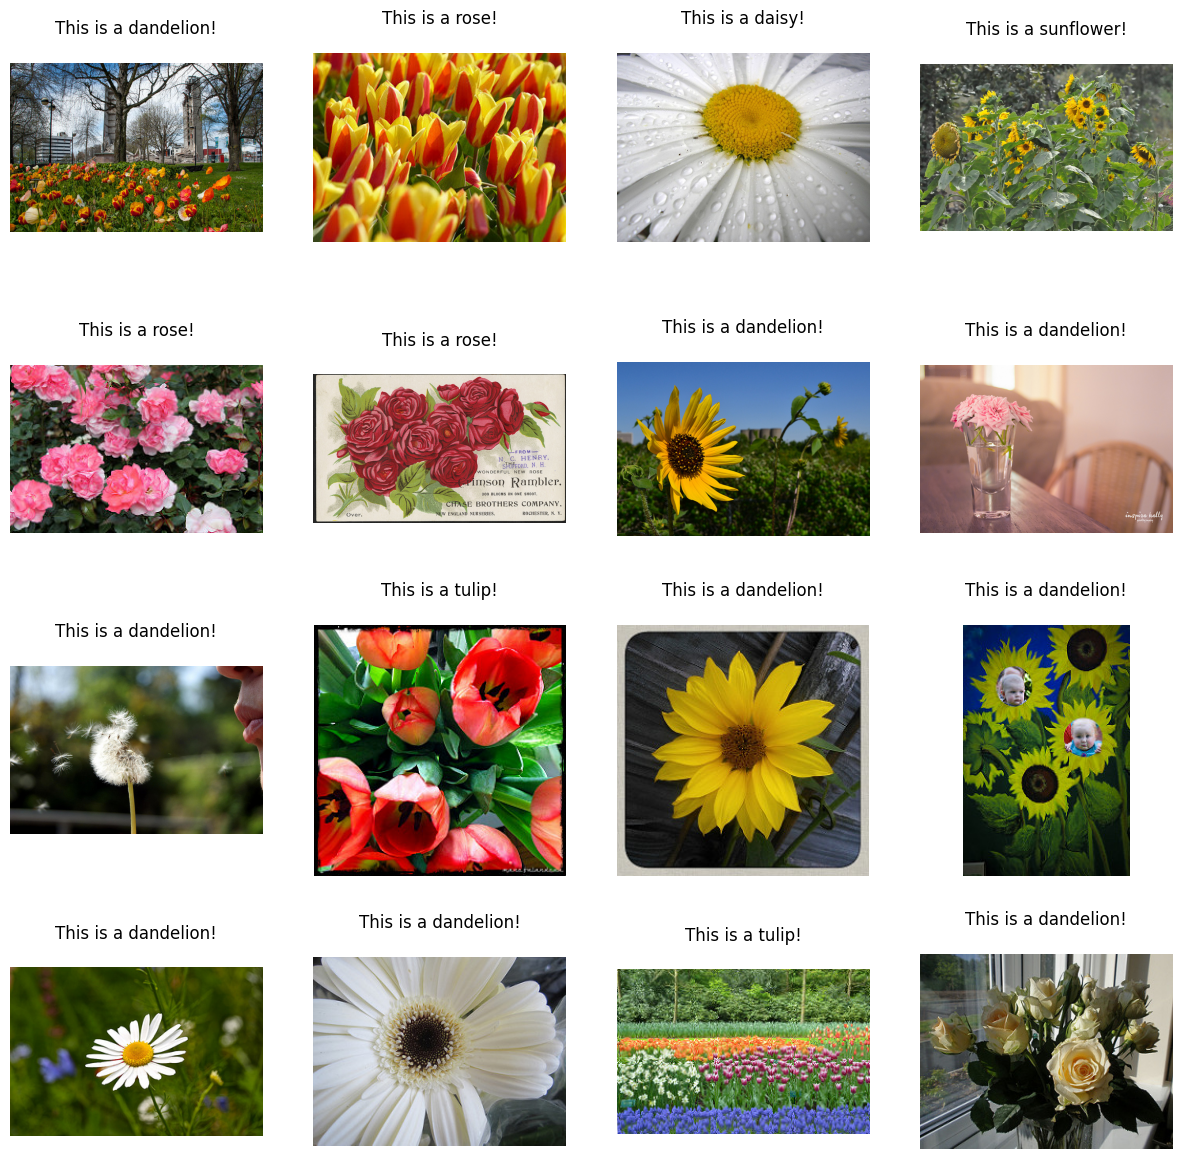

In [59]:
# Explore the data 
fig = plt.figure(figsize=(15,15))
num_images = 16
transforms_test = transf.Compose([
                            transf.Resize((128,128)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])
model.eval()
with torch.no_grad():
  _init_seed(0)
  for i in range(num_images):
    random_img = random.randint(0,len(testset)-1)
    image, label = testset[random_img]
    # Apply transformation innum_images testing
    out = model(transforms_test(image).unsqueeze(0).to(device))
    prediction = out.argmax(1)
    plt.subplot(num_images//4,4,i+1)
    plt.axis('off')
    plt.imshow(image.moveaxis(0,-1))
    if(prediction.item()==0):
      plt.title("This is a daisy!\n")
    elif (prediction.item()==1):
      plt.title("This is a dandelion!\n")
    elif (prediction.item()==2):
      plt.title("This is a rose!\n")
    elif (prediction.item()==3):
      plt.title("This is a sunflower!\n")
    elif(prediction.item()==4):
      plt.title("This is a tulip!\n")

plt.show()